<a href="https://colab.research.google.com/github/clanand11/Face_Expression_Recognition_Model/blob/main/ML_Face_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anandcl","key":"fa33fccf6b8d00bdf510908031f58cce"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 97% 117M/121M [00:01<00:00, 99.6MB/s]
100% 121M/121M [00:01<00:00, 105MB/s] 


In [ ]:
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [ ]:
TRAIN_DIR = '/content/images/train'
TEST_DIR = '/content/images/validation'

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

fear completed
neutral completed
happy completed
surprise completed
angry completed
sad completed
disgust completed


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

fear completed
neutral completed
happy completed
surprise completed
angry completed
sad completed
disgust completed


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
226/226 [==============================] - 1393s 6s/step - loss: 1.8261 - accuracy: 0.2423 - val_loss: 1.8171 - val_accuracy: 0.2584
Epoch 2/10
226/226 [==============================] - 1379s 6s/step - loss: 1.7775 - accuracy: 0.2604 - val_loss: 1.6832 - val_accuracy: 0.3220
Epoch 3/10
226/226 [==============================] - 1370s 6s/step - loss: 1.6483 - accuracy: 0.3373 - val_loss: 1.4952 - val_accuracy: 0.4230
Epoch 4/10
226/226 [==============================] - 1373s 6s/step - loss: 1.5078 - accuracy: 0.4119 - val_loss: 1.4238 - val_accuracy: 0.4597
Epoch 5/10
226/226 [==============================] - 1378s 6s/step - loss: 1.4298 - accuracy: 0.4459 - val_loss: 1.3035 - val_accuracy: 0.5024
Epoch 6/10
226/226 [==============================] - 1378s 6s/step - loss: 1.3866 - accuracy: 0.4635 - val_loss: 1.2669 - val_accuracy: 0.5181
Epoch 7/10
226/226 [==============================] - 1375s 6s/step - loss: 1.3513 - accuracy: 0.4812 - val_loss: 1.2304 - val_accuracy:

In [ ]:
# model_json = model.to_json()
# with open("emotiondetector.json",'w') as json_file:
#     json_file.write(model_json)
# model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from keras.models import model_from_json

# # Load the saved model
# json_file = open('emotiondetector.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # Load weights into the model
# model.load_weights("emotiondetector.h5")

# # Compile the model (you can use the same optimizer, loss, and metrics as before)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 1461s 6s/step - loss: 1.8241 - accuracy: 0.2421 - val_loss: 1.7998 - val_accuracy: 0.2586
Epoch 2/10
226/226 [==============================] - 1450s 6s/step - loss: 1.7965 - accuracy: 0.2520 - val_loss: 1.8123 - val_accuracy: 0.2327
Epoch 3/10
226/226 [==============================] - 1422s 6s/step - loss: 1.7289 - accuracy: 0.2869 - val_loss: 1.6308 - val_accuracy: 0.3368
Epoch 4/10
226/226 [==============================] - 1408s 6s/step - loss: 1.6001 - accuracy: 0.3704 - val_loss: 1.4808 - val_accuracy: 0.4322
Epoch 5/10
226/226 [==============================] - 1415s 6s/step - loss: 1.5041 - accuracy: 0.4127 - val_loss: 1.4592 - val_accuracy: 0.4437
Epoch 6/10
226/226 [==============================] - 1499s 7s/step - loss: 1.4481 - accuracy: 0.4380 - val_loss: 1.3882 - val_accuracy: 0.4754
Epoch 7/10
226/226 [==============================] - 1402s 6s/step - loss: 1.4085 - accuracy: 0.4571 - val_loss: 1.3112 - val_accuracy:

In [ ]:
# from keras.models import model_from_json

# # Load the saved model
# json_file = open('emotiondetector_53.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # Load weights into the model
# model.load_weights("emotiondetector_53.h5")

# # Compile the model (you can use the same optimizer, loss, and metrics as before)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 1350s 6s/step - loss: 1.3017 - accuracy: 0.5014 - val_loss: 1.2210 - val_accuracy: 0.5348
Epoch 2/10
226/226 [==============================] - 1329s 6s/step - loss: 1.2822 - accuracy: 0.5099 - val_loss: 1.1844 - val_accuracy: 0.5546
Epoch 3/10
226/226 [==============================] - 1366s 6s/step - loss: 1.2599 - accuracy: 0.5192 - val_loss: 1.1735 - val_accuracy: 0.5543
Epoch 4/10
226/226 [==============================] - 1378s 6s/step - loss: 1.2401 - accuracy: 0.5273 - val_loss: 1.1665 - val_accuracy: 0.5532
Epoch 5/10
226/226 [==============================] - 1367s 6s/step - loss: 1.2345 - accuracy: 0.5287 - val_loss: 1.1487 - val_accuracy: 0.5693
Epoch 6/10
226/226 [==============================] - 1364s 6s/step - loss: 1.2213 - accuracy: 0.5335 - val_loss: 1.1692 - val_accuracy: 0.5616
Epoch 7/10
226/226 [==============================] - 1407s 6s/step - loss: 1.2036 - accuracy: 0.5427 - val_loss: 1.1333 - val_accuracy:

In [ ]:
# model_json = model.to_json()
# with open("emotiondetector_55.json",'w') as json_file:
#     json_file.write(model_json)
# model.save("emotiondetector_55.h5")

In [ ]:
# from keras.models import model_from_json
# # Load the saved model
# json_file = open('emotiondetector_55.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # Load weights into the model
# model.load_weights("emotiondetector_55.h5")

# # Compile the model (you can use the same optimizer, loss, and metrics as before)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 1437s 6s/step - loss: 1.1624 - accuracy: 0.5572 - val_loss: 1.1035 - val_accuracy: 0.5870
Epoch 2/10
226/226 [==============================] - 1438s 6s/step - loss: 1.1475 - accuracy: 0.5634 - val_loss: 1.1067 - val_accuracy: 0.5810
Epoch 3/10
226/226 [==============================] - 1454s 6s/step - loss: 1.1440 - accuracy: 0.5687 - val_loss: 1.0935 - val_accuracy: 0.5897
Epoch 4/10
226/226 [==============================] - 1443s 6s/step - loss: 1.1350 - accuracy: 0.5720 - val_loss: 1.1233 - val_accuracy: 0.5760
Epoch 5/10
226/226 [==============================] - 1418s 6s/step - loss: 1.1283 - accuracy: 0.5727 - val_loss: 1.0873 - val_accuracy: 0.5937
Epoch 6/10
226/226 [==============================] - 1439s 6s/step - loss: 1.1118 - accuracy: 0.5776 - val_loss: 1.0727 - val_accuracy: 0.6057
Epoch 7/10
226/226 [==============================] - 1446s 6s/step - loss: 1.1099 - accuracy: 0.5825 - val_loss: 1.0741 - val_accuracy:

In [ ]:
# model_json = model.to_json()
# with open("emotiondetector_59.json",'w') as json_file:
#     json_file.write(model_json)
# model.save("emotiondetector_59.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from keras.models import model_from_json
# # Load the saved model
# json_file = open('emotiondetector_59.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # Load weights into the model
# model.load_weights("emotiondetector_59.h5")

In [ ]:
# from keras.models import model_from_json

# json_file = open('emotiondetector_59.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)


# model.load_weights("emotiondetector_59.h5")

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 1581s 7s/step - loss: 1.0778 - accuracy: 0.5922 - val_loss: 1.0664 - val_accuracy: 0.6032
Epoch 2/10
226/226 [==============================] - 1549s 7s/step - loss: 1.0696 - accuracy: 0.5943 - val_loss: 1.0660 - val_accuracy: 0.5954
Epoch 3/10
226/226 [==============================] - 1538s 7s/step - loss: 1.0647 - accuracy: 0.5978 - val_loss: 1.0684 - val_accuracy: 0.5978
Epoch 4/10
226/226 [==============================] - 1532s 7s/step - loss: 1.0524 - accuracy: 0.6025 - val_loss: 1.0600 - val_accuracy: 0.6046
Epoch 5/10
226/226 [==============================] - 1524s 7s/step - loss: 1.0497 - accuracy: 0.6037 - val_loss: 1.0704 - val_accuracy: 0.5950
Epoch 6/10
226/226 [==============================] - 1520s 7s/step - loss: 1.0445 - accuracy: 0.6071 - val_loss: 1.0687 - val_accuracy: 0.6030
Epoch 7/10
226/226 [==============================] - 1499s 7s/step - loss: 1.0355 - accuracy: 0.6093 - val_loss: 1.0597 - val_accuracy:

In [ ]:
# model_json = model.to_json()
# with open("emotiondetector_61.json",'w') as json_file:
#     json_file.write(model_json)
# model.save("emotiondetector_61.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from keras.models import model_from_json

# json_file = open('emotiondetector_61.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# model.load_weights("emotiondetector_61.h5")

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
226/226 [==============================] - 1486s 7s/step - loss: 1.0016 - accuracy: 0.6226 - val_loss: 1.0530 - val_accuracy: 0.6081
Epoch 2/10
226/226 [==============================] - 1479s 7s/step - loss: 0.9988 - accuracy: 0.6257 - val_loss: 1.0522 - val_accuracy: 0.6170
Epoch 3/10
226/226 [==============================] - 1474s 7s/step - loss: 0.9965 - accuracy: 0.6238 - val_loss: 1.0490 - val_accuracy: 0.6068
Epoch 4/10
226/226 [==============================] - 1479s 7s/step - loss: 0.9913 - accuracy: 0.6236 - val_loss: 1.0466 - val_accuracy: 0.6112
Epoch 5/10
226/226 [==============================] - 1486s 7s/step - loss: 0.9880 - accuracy: 0.6305 - val_loss: 1.0360 - val_accuracy: 0.6162
Epoch 6/10
226/226 [==============================] - 1471s 7s/step - loss: 0.9740 - accuracy: 0.6329 - val_loss: 1.0366 - val_accuracy: 0.6165
Epoch 7/10
  1/226 [..............................] - ETA: 22:54 - loss: 0.9799 - accuracy: 0.6562

KeyboardInterrupt: 

In [ ]:
model_json = model.to_json()
with open("emotiondetector_last.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector_last.h5")

In [ ]:
from keras.models import model_from_json

json_file = open('emotiondetector_last.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights("emotiondetector_last.h5")

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
evaluation = model.evaluate(x_test, y_test)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

221/221 [==============================] - 66s 298ms/step - loss: 1.0491 - accuracy: 0.6146
Test Loss: 1.049079418182373
Test Accuracy: 0.6146334409713745


In [ ]:
import numpy as np
from keras.models import model_from_json
from sklearn.metrics import precision_score

# Load the saved model architecture
json_file = open('emotiondetector_61.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# Load the model weights
model = model_from_json(loaded_model_json)
model.load_weights("emotiondetector_61.h5")

predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels
true_labels = np.argmax(y_test, axis=1)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)


221/221 [==============================] - 63s 284ms/step
Precision: 0.6037479306804203


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

original image is of sad
1/1 [==============================] - 0s 52ms/step
model prediction is  sad


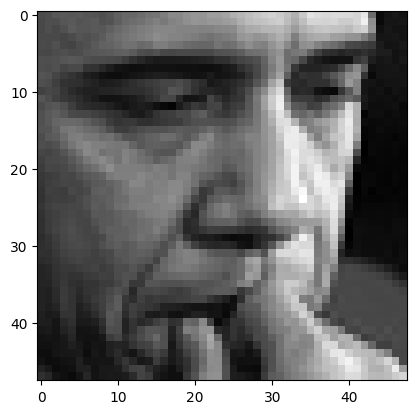

In [ ]:
image = 'images/validation/sad/10561.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 116ms/step
model prediction is  happy


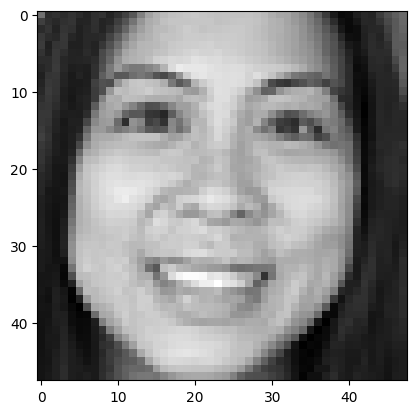

In [ ]:
image = 'images/validation/happy/10074.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 [==============================] - 0s 47ms/step
model prediction is  angry


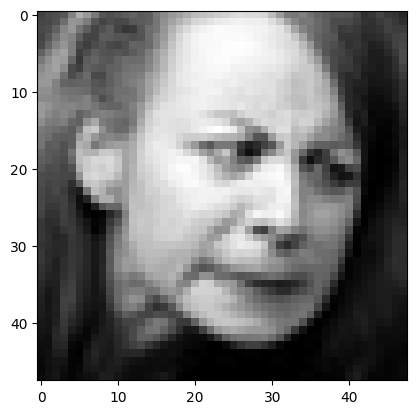

In [ ]:
image = 'images/validation/angry/10052.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')